# Paradoxo de Monty Hall

Esse notebook nos ajuda a tentar resolver o Paradoxo de Monty Hall

In [176]:

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('Defina o tamanho do espaço amostral')
n = int(input( 'n : '))

Defina o tamanho do espaço amostral
n : 10000


### Função 1:

Essa função irá criar uma lista com n posições de 1 a 3 para as posições da porta com o premium

In [177]:
def posiçao_premio(n):
    
    posiç_prem = np.random.randint(3, size=n)
    posiç_prem = posiç_prem + 1
    
    return posiç_prem

    

### Função 2:

Agora vamos criar uma lista com n escolhas para o participante do jogo

In [178]:
def escolha(n):
    
    escolha = np.random.randint(3, size=n)
    escolha = escolha + 1
    
    return escolha

### Função 3:

Essa função cria uma lista com as portas que foram abertas pelo apresentador do show

In [179]:
def porta_aberta(posiçao_premio, escolha):
    
    porta_aberta = []
    for i in range(len(posiçao_premio)):
             
        x = np.random.randint(3, size=1)
        x = x + 1
        while x == posiçao_premio[i] or x ==  escolha[i]  :
                
            x = np.random.randint(3, size=1)
            x = x + 1
            
            
        porta_aberta.append(x[0])


            
    return porta_aberta        
            
posiçao_premio = posiçao_premio(n)            
escolha =  escolha(n)           
porta_aberta = porta_aberta(posiçao_premio, escolha)

nao_trocou = pd.DataFrame({'Porta Premiada' : posiçao_premio ,
                           'Porta Escolhida' : escolha,
                           'Porta Revelada' : porta_aberta})

### Função 4:

Essa função só será utilizada para os participantes que escolhem mudar de porta

In [180]:
def troca_porta(escolha, porta_aberta):
    
    troca_porta = []
    for i in range(len(escolha)):
        x = np.random.randint(3, size=1)
        x = x + 1
        while x == porta_aberta[i] or x ==  escolha[i]  :
                
            x = np.random.randint(3, size=1)
            x = x + 1
            
            
        troca_porta.append(x[0])


            
    return troca_porta
        

In [181]:


troca_porta = troca_porta(escolha, porta_aberta)
trocou = pd.DataFrame({'Porta Premiada' : posiçao_premio ,
              'Porta Escolhida' : escolha,
              'Porta Revelada' : porta_aberta,
              'Nova Porta' : troca_porta}) 
pd.DataFrame({'Porta Premiada' : posiçao_premio ,
              'Porta Escolhida' : escolha,
              'Porta Revelada' : porta_aberta,
              'Nova Porta' : troca_porta})

,Porta Premiada,Porta Escolhida,Porta Revelada,Nova Porta
0,1,1,3,2
1,2,1,3,2
2,1,2,3,1
3,3,3,1,2
4,2,1,3,2
...,...,...,...,...
9995,2,3,1,2
9996,2,1,3,2
9997,2,1,3,2
9998,1,3,2,1


Agora para finalizar vamos calcular a % de acertos no cenário onde o candidato troca de porta e no cenário onde não troca

In [182]:
pts_troca = 0
pts_naotroca = 0

for i in range(n):

    # para cada acerto o candidato receberá um ponto, assim iremos calcular a % de acertos
    if trocou['Porta Premiada'][i] == trocou['Nova Porta'][i]: 
        pts_troca = pts_troca + 1
        
    if nao_trocou['Porta Premiada'][i] == nao_trocou['Porta Escolhida'][i]:
        pts_naotroca = pts_naotroca + 1

        
print(pd.Series([pts_troca/n, pts_naotroca/n] , index = ['Taxa de Acerto Daqueles que Trocaram : ', 
                                                   'Taxa de Acerto Daqueles que não Trocaram : '])) 





Taxa de Acerto Daqueles que Trocaram :         0.6683
Taxa de Acerto Daqueles que não Trocaram :     0.3317
dtype: float64


Para finalizar vamos entender graficamente os resultados.

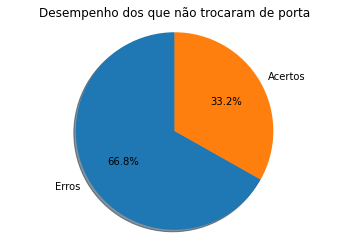

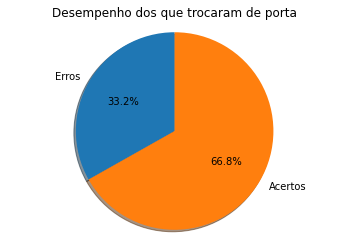

In [183]:
labels = 'Erros', 'Acertos'
sizes = [100 - (pts_naotroca/n)*100, (pts_naotroca/n)*100]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Desempenho dos que não trocaram de porta')
plt.show()

labels = 'Erros', 'Acertos'
sizes = [100 - (pts_troca/n)*100, (pts_troca/n)*100]





fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  
plt.title('Desempenho dos que trocaram de porta')
plt.show()
